In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import colors
import aplpy
import astropy.wcs as wcs

In [3]:
### load constants and functions
# Image information and assumptions
distance        = 8340. # distance to GC; Reid et al. 2014
#Temp            = 20.0
Wave            = (3.0e8/(226e9))
Wave0           = 1.3e-3
k0              = 0.899
nu              = 3.e08/Wave
nu0             = 3.e08/Wave0
beta            = 1.75
Kappag2d        = k0*((nu/nu0)**beta)
g2d             = 100.0
Kappa           = Kappag2d / g2d
mu              = 2.8 # express everything in H2

dustTemp = 20

# Constants
G = 6.67408e-11
msun = 1.989e33
mh = 1.6737236e-27
pc2cm = 3.08567758e18
as2persr = 4.25e10 
percm2perm = 1.0e6
JyperSr_to_JyperPix = (3.0462*(10**-4))*((0.00013888888888)**2) ### 
JyperSr_to_Jyperassqr = ((np.pi*180.)**(-2))*(3600**(-1))
hplanck = 6.63e-34
clight = 2.99792e8
kboltzmann = 1.381e-23
sin1yr = 3.15569e7
arcsec2pc = distance/((360./(2.*np.pi))*60.*60.)

In [4]:
BMAJ    =   9.391762150659E-04
BMIN    =   8.101911677255E-04 
deg2_per_beam = np.pi*BMAJ*BMIN
deg2_per_pix = (1.388888888889E-04)**2
path = '/Users/hph/cmzoom_catalog/simobserve_kernel/'

In [5]:
#The Kernel Size is: 14
#The Average percent array is: [ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.7  0.7  0.5
#  0.4  0.3  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
#The FP Average percent array is: [ 2.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
#  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
    
# The Kernel Size is: 14
# The Average percent array is: [ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.9  0.7  0.7  0.6
#   0.6  0.5  0.6  0.6  0.5  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0. ]
# The FP Average percent array is: [ 1.  1.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
#   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]  

# The Kernel Size is: 14
# The Average percent array is: [ 1.   1.   1.   1.   0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.7  0.6
#   0.5  0.3  0.2  0.2  0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
# The FP Average percent array is: [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
#   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

fp1_k14 = [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]
fp2_k14 = [ 1.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]
fp3_k14 = [ 2.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]

fp_avg_k14 = (np.mean(fp1_k14)/10.+np.mean(fp2_k14)/10.+np.mean(fp3_k14)/10.)/3.
print(fp_avg_k14)

0.024444444444444446


In [6]:
# The Kernel Size is: 20
# The Average percent array is: [ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
#   1.   0.9  0.6  0.6  0.6  0.3  0.1  0.   0.   0.   0.   0.   0.   0.   0. ]
# The FP Average percent array is: [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.
#   2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
fp1_k20 = np.array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
fp_avg_k20 = np.mean(fp1_k20)/10.
print(fp_avg_k20)

0.03333333333333333


In [7]:
mv_arr=[ 130.13610413,  125.65426158,  121.17241903,  116.69057648,  112.20873392,
   107.72689137,  103.24504882,   98.76320627,   94.28136372,   89.79952116,
    85.31767861,   80.83583606,   76.35399351,   71.87215096,   67.39030841,
    62.90846585,   58.4266233,    53.94478075,   49.4629382,    44.98109565,
    40.4992531,    36.01741054,   31.53556799,   27.05372544,   22.57188289,
    18.09004034,   13.60819779,    9.12635523,    4.64451268,    0.16267013]

In [8]:
# The Kernel size is: 7
# The Average percent array is: [ 0.96666667  0.96666667  0.96666667  0.96666667  0.96666667  0.96666667
#   0.93333333  0.83333333  0.83333333  0.8         0.73333333  0.73333333
#   0.7         0.66666667  0.66666667  0.63333333  0.56666667  0.53333333
#   0.53333333  0.5         0.4         0.2         0.2         0.2
#   0.13333333  0.06666667  0.06666667  0.03333333  0.03333333  0.        ]
# The FP Average percent array is: [ 5.          3.33333333  3.33333333  3.66666667  4.33333333  3.33333333
#   3.33333333  2.          0.66666667  0.66666667  0.          0.          0.
#   0.          0.33333333  0.33333333  0.          0.          0.
#   0.33333333  0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]

fp_avg_k7=np.mean([ 5., 3.33,  3.33,  3.67,  4.33,  3.33, 3.33, 2.,0.67, 0.67, 0, 0., 0., 0., 0.33333333])/10.
comp_avg_k7=mv_arr[7]
print(fp_avg_k7)

0.19995555553333336


In [9]:
# The Kernel Size is: 8
# The Average percent array is: [ 1.          1.          1.          1.          1.          1.          1.
#   1.          1.          1.          1.          1.          0.96666667
#   0.96666667  0.86666667  0.86666667  0.8         0.7         0.6
#   0.56666667  0.5         0.43333333  0.33333333  0.26666667  0.23333333
#   0.06666667  0.03333333  0.03333333  0.          0.        ]
# The FP Average percent array is: [ 4.33333333  4.33333333  9.33333333  3.          4.          3.33333333
#   3.33333333  2.66666667  2.66666667  3.33333333  2.66666667  4.33333333
#   2.33333333  2.33333333  2.          2.          1.33333333  1.          1.
#   1.          1.          0.66666667  0.66666667  0.66666667  0.33333333
#   1.          0.          0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_k8 = np.mean([ 4.33333333,  4.33333333,  9.33333333,  3.,          4.,          3.33333333, 3.33333333,  2.66666667,  2.66666667,  3.33333333,  2.66666667,  4.33333333, 2.33333333,  2.33333333,  2.])/10.
comp_avg_k8=mv_arr[14]
print(fp_avg_k8)

0.3599999998666667


In [10]:
# The Kernel Size is: 9
# The Average percent array is: [ 0.96666667  0.96666667  0.96666667  0.96666667  0.96666667  0.96666667
#   0.96666667  0.96666667  0.96666667  0.96666667  0.93333333  0.93333333
#   0.9         0.9         0.86666667  0.8         0.73333333  0.7
#   0.63333333  0.53333333  0.53333333  0.46666667  0.36666667  0.23333333
#   0.03333333  0.03333333  0.          0.          0.          0.        ]
# The FP Average percent array is: [ 5.33333333  3.66666667  3.66666667  2.33333333  2.66666667  2.66666667
#   2.66666667  3.33333333  1.33333333  2.          1.66666667  1.33333333
#   1.          1.33333333  1.          0.66666667  1.          0.33333333
#   0.33333333  0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_k9 = np.mean([ 5.33333333,  3.66666667,  3.66666667,  2.33333333,  2.66666667,  2.66666667,   2.66666667,  3.33333333,  1.33333333,  2.,          1.66666667,  1.33333333,   1.,         1.33333333,  1.])/10.
comp_avg_k9=mv_arr[14]
print(fp_avg_k9)

0.24


In [11]:
# The Kernel Size is: 10
# The Average percent array is: [ 1.          1.          1.          1.          1.          1.
#   0.96666667  0.93333333  0.9         0.9         0.86666667  0.86666667
#   0.83333333  0.83333333  0.83333333  0.76666667  0.76666667  0.63333333
#   0.53333333  0.4         0.33333333  0.3         0.03333333  0.          0.
#   0.          0.          0.          0.          0.        ]
# The FP Average percent array is: [ 1.66666667  1.33333333  1.33333333  1.33333333  1.33333333  2.
#   1.33333333  0.33333333  0.33333333  0.33333333  0.          1.
#   0.33333333  0.33333333  0.33333333  0.66666667  1.          0.33333333
#   0.66666667  0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_k10=np.mean([ 1.66666667,  1.33333333,  1.33333333,  1.33333333,  1.33333333,  2., 1.33333333,  0.33333333,  0.33333333,  0.33333333, 0., 1., 0.33333333,  0.33333333])/10.
comp_avg_k10=mv_arr[10]
print(fp_avg_k10)


0.09285714264285716


In [12]:
# The Kernel Size is: 11
# The Average percent array is: [ 1.          0.93333333  0.93333333  0.93333333  0.93333333  0.93333333
#   0.93333333  0.9         0.93333333  0.8         0.8         0.83333333
#   0.83333333  0.83333333  0.76666667  0.73333333  0.53333333  0.53333333
#   0.2         0.2         0.16666667  0.13333333  0.06666667  0.06666667
#   0.          0.          0.          0.          0.          0.        ]
# The FP Average percent array is: [ 2.66666667  3.          2.33333333  1.33333333  1.33333333  1.33333333
#   1.          1.          1.          0.33333333  0.33333333  0.33333333
#   0.66666667  0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_k11 = np.mean([ 2.66666667,  3., 2.33333333,  1.33333333,  1.33333333,  1.33333333, 1.,1., 1., 0.33333333,  0.33333333,  0.33333333, 0.66666667,  0., 0.])/10.
comp_avg_k11=mv_arr[9]
print(fp_avg_k11)

0.111111111


In [13]:
# The Kernel Size is: 12
# The Average percent array is: [ 1.          1.          1.          1.          0.96666667  0.9
#   0.96666667  0.96666667  0.9         0.86666667  0.86666667  0.86666667
#   0.83333333  0.8         0.73333333  0.73333333  0.6         0.43333333
#   0.43333333  0.4         0.33333333  0.2         0.1         0.06666667
#   0.06666667  0.          0.          0.          0.          0.        ]
# The FP Average percent array is: [ 4.          2.33333333  0.66666667  2.          3.66666667  0.66666667
#   2.33333333  2.          0.33333333  0.          0.          0.          0.
#   0.          0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.          0.          0.          0.
#   0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_k12=np.mean([ 4., 2.33333333,  0.66666667,  2.,  3.66666667,  0.66666667, 2.33333333,  2.,  0.33333333, 0., 0., 0.,  0., 0.,          0.])/10.
comp_avg_k12=mv_arr[9]
print(fp_avg_k12)

0.12


In [14]:
# The Kernel Size is: 13
# The Average percent array is: [ 1.          1.          1.          1.          1.          1.          1.
#   0.93333333  0.9         0.9         0.83333333  0.83333333  0.76666667
#   0.7         0.63333333  0.43333333  0.4         0.36666667  0.3
#   0.23333333  0.23333333  0.2         0.          0.          0.          0.
#   0.          0.          0.          0.        ]
# The FP Average percent array is: [ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
#   0.33333333  0.33333333  0.33333333  0.33333333  0.66666667  0.66666667
#   0.33333333  0.33333333  0.          0.          0.          0.          0.
#   0.          0.          0.33333333  0.33333333  0.33333333  0.
#   0.33333333  0.          0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_k13=np.mean([0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333, 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.66666667,  0.66666667,  0.33333333,  0.33333333,  0. ])/10.
comp_avg_k13=mv_arr[10]
print(fp_avg_k13)

0.035555555333333336


In [15]:
# The Kernel Size is: 14
# The Average percent array is: [ 0.93333333  0.93333333  0.93333333  0.93333333  0.93333333  0.93333333
#   0.93333333  0.93333333  0.9         0.9         0.9         0.86666667
#   0.7         0.7         0.66666667  0.7         0.63333333  0.6
#   0.53333333  0.36666667  0.1         0.06666667  0.06666667  0.03333333
#   0.          0.          0.          0.          0.          0.        ]
# The FP Average percent array is: [ 1.66666667  1.66666667  0.66666667  0.66666667  1.66666667  0.66666667
#   0.33333333  1.66666667  0.66666667  0.33333333  1.          0.66666667
#   1.          0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_14 = np.mean([ 1.66666667,  1.66666667,  0.66666667,  0.66666667,  1.66666667,  0.66666667, 0.33333333,  1.66666667,  0.66666667,  0.33333333,  1.,          0.66666667, 1., 0.,  0.])/10.
comp_avg_k14=mv_arr[11]
print(fp_avg_14)

0.08444444459999999


In [16]:
# The Kernel Size is: 15
# The Average percent array is: [ 1.          1.          1.          1.          1.          0.96666667
#   1.          1.          1.          0.93333333  0.93333333  0.9         0.9
#   0.86666667  0.8         0.76666667  0.6         0.43333333  0.26666667
#   0.13333333  0.03333333  0.          0.          0.          0.          0.
#   0.          0.          0.          0.        ]
# The FP Average percent array is: [ 4.66666667  2.66666667  1.66666667  1.66666667  1.33333333  1.
#   3.33333333  0.66666667  0.66666667  0.66666667  0.33333333  0.33333333
#   0.33333333  0.33333333  1.          0.33333333  0.          0.          0.
#   0.          0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_k15=np.mean([ 4.66666667,  2.66666667,  1.66666667,  1.66666667, 1.33333333,  1.,
  3.33333333,  0.66666667,  0.66666667,  0.66666667,  0.33333333,  0.33333333,
  0.33333333,  0.33333333,  1.])/10.  
comp_avg_k15=mv_arr[13]
print(fp_avg_k15)

0.13777777779999997


In [17]:
# The Kernel Size is: 16
# The Average percent array is: [ 1.          1.          1.          1.          1.          1.
#   0.96666667  0.93333333  0.86666667  0.86666667  0.86666667  0.83333333
#   0.8         0.7         0.66666667  0.4         0.26666667  0.3
#   0.23333333  0.16666667  0.06666667  0.06666667  0.06666667  0.          0.
#   0.          0.          0.          0.          0.        ]
# The FP Average percent array is: [ 1.66666667  1.33333333  1.33333333  2.33333333  1.          1.          1.
#   1.          1.          1.          0.66666667  0.33333333  0.
#   0.66666667  1.66666667  0.33333333  0.          0.          0.          0.
#   0.          0.          0.          0.          0.          0.          0.
#   0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_k16=np.mean([ 1.66666667,  1.33333333,  1.33333333,  2.33333333,  1.,          1.,          1.,
  1.,          1.,          1.,          0.66666667,  0.33333333,  0.,
  0.66666667,  1.66666667])/10.
comp_avg_k16=mv_arr[8]
print(fp_avg_k16)

0.10666666666666666


In [18]:
# The Kernel Size is: 17
# The Average percent array is: [ 1.          1.          1.          1.          1.          1.
#   0.96666667  0.93333333  0.9         0.83333333  0.86666667  0.76666667
#   0.73333333  0.73333333  0.7         0.66666667  0.66666667  0.56666667
#   0.46666667  0.3         0.3         0.16666667  0.          0.          0.
#   0.          0.          0.          0.          0.        ]
# The FP Average percent array is: [ 4.          3.66666667  2.66666667  1.          2.66666667  1.          1.
#   1.          1.          0.66666667  1.          0.33333333  0.33333333
#   0.33333333  0.          0.          0.33333333  0.          0.          0.
#   0.          0.          0.          0.          0.          0.          0.
#   0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_k17=np.mean([ 4.,          3.66666667,  2.66666667,  1.,          2.66666667,  1. ,         1.,
  1.,          1.,          0.66666667,  1.,          0.33333333,  0.33333333,
  0.33333333,  0.])/10.
comp_avg_k17 = mv_arr[10]
print(fp_avg_k17)


0.13777777779999997


In [19]:
# The Kernel Size is: 18
# The Average percent array is: [ 1.          1.          1.          1.          1.          1.          1.
#   1.          1.          1.          1.          0.96666667  0.96666667
#   0.86666667  0.83333333  0.73333333  0.73333333  0.66666667  0.36666667
#   0.3         0.23333333  0.13333333  0.03333333  0.          0.          0.
#   0.          0.          0.          0.        ]
# The FP Average percent array is: [ 0.33333333  0.33333333  0.33333333  0.          0.          0.          0.
#   0.          0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.          0.          0.          0.
#   0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_k18 = np.mean([ 0.33333333,  0.33333333,  0.,          0.33333333,  0.33333333,  0.,
  0.33333333,  0.33333333,  0.33333333,  0.,          0.,          0.,          0.,
  0.,          0.])/10.
comp_avg_k18 = mv_arr[13]
print(fp_avg_k18)


0.0155555554


In [20]:
# The Kernel Size is: 19
# The Average percent array is: [ 1.          1.          1.          1.          0.96666667  0.96666667
#   0.96666667  0.96666667  0.96666667  0.96666667  0.96666667  0.96666667
#   0.93333333  0.93333333  0.86666667  0.63333333  0.6         0.53333333
#   0.5         0.23333333  0.13333333  0.13333333  0.          0.          0.
#   0.          0.          0.          0.          0.        ]
# The FP Average percent array is: [ 1.33333333  1.33333333  1.          1.33333333  1.33333333  0.33333333
#   1.          1.33333333  0.33333333  0.33333333  0.          0.          0.
#   0.33333333  0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.          0.          0.          0.
#   0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_k19=np.mean([ 1.33333333,  1.33333333,  1.,          1.33333333,  1.33333333,  0.33333333,
  1.,          1.33333333,  0.33333333,  0.33333333,  0.,          0.,          0.,
  0.33333333,  0.])/10. 
comp_avg_k19=mv_arr[13]
print(fp_avg_k19)

0.06666666646666669


In [21]:
# The Kernel Size is: 20
# The Average percent array is: [ 1.          0.96666667  0.96666667  0.96666667  0.93333333  0.93333333
#   0.93333333  0.93333333  0.93333333  0.93333333  0.86666667  0.86666667
#   0.86666667  0.76666667  0.7         0.6         0.46666667  0.36666667
#   0.33333333  0.26666667  0.16666667  0.          0.          0.          0.
#   0.          0.          0.          0.          0.        ]
# The FP Average percent array is: [ 2.          1.          1.33333333  1.          1.          1.33333333
#   1.33333333  0.33333333  0.66666667  0.33333333  0.33333333  0.66666667
#   0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.          0.
#   0.          0.          0.          0.          0.          0.          0.
#   0.          0.          0.          0.        ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]
fp_avg_k20 = np.mean([2.,          1.,          1.33333333,  1.,          1.,          1.33333333,
  1.33333333,  0.33333333,  0.66666667,  0.33333333,  0.33333333,  0.66666667,
  0.33333333,  0.33333333])/10.
comp_avg_k20 = mv_arr[9]
print(fp_avg_k20)

0.08571428557142859


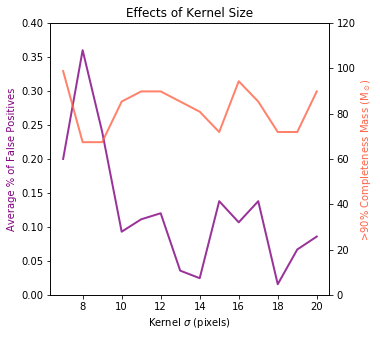

In [30]:
plt.close()
kernel_array=[7,8,9,10,11,12,13,14,15,16,17,18,19,20]
fp_avg_array=[fp_avg_k7,fp_avg_k8,fp_avg_k9,fp_avg_k10, fp_avg_k11, fp_avg_k12, fp_avg_k13, fp_avg_k14,
              fp_avg_k15, fp_avg_k16, fp_avg_k17, fp_avg_k18, fp_avg_k19, fp_avg_k20]
comp_avg_array=[comp_avg_k7,comp_avg_k8,comp_avg_k9,comp_avg_k10, comp_avg_k11, comp_avg_k12, comp_avg_k13, 
                comp_avg_k14,comp_avg_k15, comp_avg_k16, comp_avg_k17, comp_avg_k18, comp_avg_k19, comp_avg_k20]
mrfig,ax1 = plt.subplots(figsize=(5,5))
ax1.plot(kernel_array, fp_avg_array,ls='-',color='purple',linewidth='2.0', 
         label ='mean % of false positives',alpha=0.8 )
ax1.set_xlabel('Kernel $\sigma$ (pixels)')
ax1.set_ylabel('Average % of False Positives',color='purple')
ax1.set_ylim(0,0.4)
ax2 = ax1.twinx()
ax2.plot(kernel_array, comp_avg_array,ls='-',color='tomato',linewidth='2.0', 
         label ='>90% completeness mass',alpha=0.8 )
ax2.set_ylabel('>90% Completeness Mass (M$_\odot$)',color='tomato')
ax2.set_ylim(0,120)
plt.title('Effects of Kernel Size')
#ax1.grid()
#ax1.legend(loc='lower left')
#ax2.legend(loc='upper right')
mrfig.savefig(path+'simobs_percent.pdf',format='pdf')
plt.show()

In [91]:
# The Kernel Size is: 18
# final array list is:
# [[ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1. ]
#  [ 0.9  1.   1.   1.   1.   1.   1.   1.   1.   1. ]
#  [ 0.9  1.   1.   1.   1.   1.   1.   1.   1.   1. ]
#  [ 0.9  1.   1.   1.   1.   1.   1.   1.   1.   1. ]
#  [ 0.9  1.   1.   1.   1.   1.   1.   1.   1.   1. ]
#  [ 0.9  1.   1.   1.   1.   1.   1.   1.   1.   1. ]
#  [ 0.8  1.   1.   1.   1.   1.   1.   1.   1.   1. ]
#  [ 0.8  1.   1.   1.   1.   1.   1.   0.9  1.   1. ]
#  [ 0.8  1.   1.   1.   1.   1.   1.   0.9  1.   1. ]
#  [ 0.6  1.   1.   1.   1.   1.   1.   0.9  0.9  1. ]
#  [ 0.6  1.   1.   1.   1.   1.   1.   0.9  1.   1. ]
#  [ 0.6  1.   1.   0.9  1.   1.   1.   0.9  0.9  1. ]
#  [ 0.6  1.   1.   0.9  1.   0.7  1.   0.9  0.9  1. ]
#  [ 0.6  0.9  0.9  0.9  0.8  0.7  0.9  0.8  0.6  1. ]
#  [ 0.4  0.9  0.9  0.9  0.7  0.7  0.9  0.8  0.5  1. ]
#  [ 0.4  0.6  0.8  0.9  0.5  0.7  0.8  0.8  0.5  1. ]
#  [ 0.4  0.5  0.6  0.8  0.5  0.7  0.8  0.7  0.5  1. ]
#  [ 0.3  0.3  0.2  0.6  0.5  0.5  0.7  0.6  0.4  0.7]
#  [ 0.1  0.3  0.2  0.6  0.5  0.5  0.1  0.6  0.4  0.7]
#  [ 0.   0.2  0.1  0.3  0.   0.2  0.1  0.6  0.3  0.7]
#  [ 0.   0.1  0.   0.2  0.   0.2  0.1  0.6  0.2  0.5]
#  [ 0.   0.   0.   0.   0.   0.1  0.   0.4  0.1  0.3]
#  [ 0.   0.   0.   0.   0.   0.1  0.   0.1  0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.   0.   0.1  0.   0.1]
#  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]]
# final FP array list is:
# [[  0.   0.   2.   0.   0.   0.   0.   1.   0.   3.]
#  [  0.   0.   1.   0.   1.   0.   0.   2.   0.   5.]
#  [  0.   0.   2.   0.   3.   0.   0.   0.   0.   3.]
#  [  0.   0.   1.   0.   0.   0.   0.   0.   0.   6.]
#  [  0.   0.   1.   0.   0.   0.   0.   0.   0.   4.]
#  [  0.   0.   1.   0.   0.   0.   1.   0.   0.   3.]
#  [  0.   0.   1.   0.   0.   0.   0.   0.   0.  11.]
#  [  0.   0.   1.   0.   0.   0.   1.   3.   0.   4.]
#  [  0.   0.   1.   0.   0.   0.   0.   1.   0.   4.]
#  [  0.   0.   1.   0.   0.   0.   1.   1.   0.   1.]
#  [  0.   0.   1.   0.   0.   0.   0.   0.   0.   1.]
#  [  0.   0.   0.   0.   1.   0.   0.   0.   0.   1.]
#  [  0.   0.   0.   0.   0.   0.   0.   1.   0.   2.]
#  [  0.   0.   1.   0.   0.   0.   0.   0.   0.   3.]
#  [  0.   0.   1.   0.   0.   0.   0.   0.   0.   2.]
#  [  0.   0.   1.   0.   0.   0.   0.   0.   0.   2.]
#  [  0.   0.   1.   0.   0.   0.   0.   0.   0.   2.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
# The Average percent array is: [ 1.    0.99  0.99  0.99  0.99  0.99  0.98  0.97  0.97  0.94  0.95  0.93
#   0.9   0.81  0.77  0.7   0.65  0.48  0.4   0.25  0.19  0.09  0.02  0.02
#   0.    0.    0.    0.    0.    0.  ]
# The FP Average percent array is: [ 0.6  0.9  0.8  0.7  0.5  0.5  1.2  0.9  0.6  0.4  0.2  0.2  0.3  0.4  0.3
#   0.3  0.3  0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]

In [ ]:
# The Kernel Size is: 14
# final array list is:
# [[ 1.   1.   1.   1.   1.   1.   1.   1.   1.   0.9]
#  [ 1.   1.   1.   1.   1.   1.   1.   1.   1.   0.9]
#  [ 1.   1.   1.   1.   1.   1.   1.   1.   1.   0.9]
#  [ 0.9  1.   1.   1.   1.   1.   1.   1.   1.   0.9]
#  [ 0.9  1.   1.   1.   1.   1.   1.   1.   1.   0.9]
#  [ 0.9  1.   1.   1.   1.   1.   1.   1.   1.   0.9]
#  [ 0.9  1.   1.   1.   1.   1.   1.   1.   1.   0.9]
#  [ 0.9  1.   1.   1.   1.   1.   1.   1.   1.   0.9]
#  [ 0.9  1.   1.   1.   0.9  1.   0.9  1.   1.   0.9]
#  [ 0.9  1.   1.   0.9  0.9  1.   0.9  1.   1.   0.9]
#  [ 0.9  1.   0.9  1.   0.9  1.   0.9  1.   1.   0.8]
#  [ 0.9  1.   0.9  1.   0.9  1.   0.9  1.   1.   0.8]
#  [ 0.9  1.   0.9  0.9  0.9  0.9  0.9  0.9  1.   0.8]
#  [ 0.9  1.   0.7  0.9  0.9  0.9  0.8  0.9  1.   0.8]
#  [ 0.9  1.   0.6  0.9  0.8  0.9  0.8  0.9  0.9  0.8]
#  [ 0.8  1.   0.6  0.6  0.6  0.9  0.7  0.9  0.7  0.6]
#  [ 0.7  0.9  0.3  0.6  0.6  0.9  0.7  0.9  0.6  0.6]
#  [ 0.7  0.9  0.   0.5  0.6  0.8  0.5  0.7  0.6  0.2]
#  [ 0.7  0.9  0.   0.5  0.4  0.7  0.5  0.7  0.6  0.2]
#  [ 0.6  0.9  0.   0.3  0.1  0.4  0.   0.7  0.   0.1]
#  [ 0.6  0.5  0.   0.2  0.   0.4  0.   0.7  0.   0.1]
#  [ 0.3  0.   0.   0.2  0.   0.4  0.   0.3  0.   0. ]
#  [ 0.3  0.   0.   0.   0.   0.3  0.   0.   0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.3  0.   0.   0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.1  0.   0.   0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
#  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]]
# final FP array list is:
# [[  0.   0.   2.   2.   2.   1.   2.   1.   8.   1.]
#  [  0.   0.   1.   4.   2.   1.   2.   4.   8.   1.]
#  [  0.   0.   1.   4.   2.   1.   2.   1.   8.   1.]
#  [  0.   0.   2.   3.   2.   1.   1.   1.   0.   1.]
#  [  0.   0.   1.   3.   2.   1.   1.   1.  11.   0.]
#  [  0.   0.   1.   3.   2.   1.   1.   0.   0.   0.]
#  [  0.   0.   1.   3.   2.   1.   1.   0.   0.   0.]
#  [  0.   0.   1.   1.   2.   1.   2.   0.   8.   0.]
#  [  0.   0.   1.   3.   1.   1.   2.   0.   8.   0.]
#  [  0.   0.   1.   0.   1.   1.   2.   0.   4.   0.]
#  [  0.   1.   0.   1.   1.   0.   2.   0.   0.   0.]
#  [  0.   0.   0.   1.   0.   2.   1.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   1.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
#  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
# The Average percent array is: [ 0.99  0.99  0.99  0.98  0.98  0.98  0.98  0.98  0.96  0.95  0.94  0.94
#   0.91  0.88  0.85  0.74  0.68  0.55  0.52  0.31  0.25  0.12  0.06  0.03
#   0.01  0.    0.    0.    0.    0.  ]
# The FP Average percent array is: [ 1.9  2.3  2.   1.1  2.   0.8  0.8  1.5  1.6  0.9  0.5  0.4  0.1  0.   0.
#   0.1  0.1  0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
# The peak values  array is: [ 0.08        0.07724483  0.07448966  0.07173448  0.06897931  0.06622414
#   0.06346897  0.06071379  0.05795862  0.05520345  0.05244828  0.0496931
#   0.04693793  0.04418276  0.04142759  0.03867241  0.03591724  0.03316207
#   0.0304069   0.02765172  0.02489655  0.02214138  0.01938621  0.01663103
#   0.01387586  0.01112069  0.00836552  0.00561034  0.00285517  0.0001    ]
# The mass values array is: [ 130.13610413  125.65426158  121.17241903  116.69057648  112.20873392
#   107.72689137  103.24504882   98.76320627   94.28136372   89.79952116
#    85.31767861   80.83583606   76.35399351   71.87215096   67.39030841
#    62.90846585   58.4266233    53.94478075   49.4629382    44.98109565
#    40.4992531    36.01741054   31.53556799   27.05372544   22.57188289
#    18.09004034   13.60819779    9.12635523    4.64451268    0.16267013]